In [1]:
#import Necessary Library 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the data for analysis
def import_data(name, filepath):
    name = pd.read_csv(filepath)
    return name

#drop Unnecessary column
def drop_col(data, columns):
    data.drop(columns=[columns], inplace=True, errors='ignore')
    return data

#get data  information & check missing values
def get_info(data):
    print('This is quick info of data set:')
    data.info()
    print('This is information if any Null value or not:')
    na = data.isna().any().sum()
    if na > 0:
        print('There are some Null Values', na)
    else: 
        print('No Null Values', na)
        
#check duplicated values
def get_duplicate(data):
    print('This is information if any Null value or not:')
    dup = data.isna().any().sum()
    if dup > 0:
        print('There are some Duplicated Values', dup)
    else: 
        print('No Duplicated Values', dup)
        
#get statistics descriptive
def get_describe(data):
    return data.describe().T

#Convert time format
def convert_to_datetime(data: pd.DataFrame = None, column: str = None):
  dummy = data.copy()
  dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
  return dummy

###VISUALTIZATION
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
    sns.displot(data=data, x=column, kde=True, height=height, aspect=height/5)
    plt.show()

def get_unique_values(data, column):
    unique_values = df[column].unique()
    num_unique_values = len(unique_values)
    print(f"{column} column has {num_unique_values} unique values:")
    print(unique_values)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 10):
    sns.set(style="whitegrid")
    g = sns.catplot(x=column, data=data, kind="count", height=height, aspect=height/4)
    g.set_axis_labels(column, "Count")
    g.fig.suptitle(f"Distribution of {column}")
    plt.show()
    
def create_grouped_bar_chart(data):
    # Group the data by category and unit price
    grouped = data.groupby(['category', 'unit_price']).size().unstack()

    # Create a bar chart of the grouped data
    fig, ax = plt.subplots(figsize=(10, 8))
    grouped.plot(kind='bar', stacked=True, ax=ax)

    # Set the chart title and axis labels
    ax.set_title('Category Grouped by Unit Price')
    ax.set_xlabel('Unit Price')
    ax.set_ylabel('Count')

    # Move the legend outside of the plot area and set it to two columns
    ax.legend(bbox_to_anchor=(1.04, 1), loc='upper left', ncol=2)

    # Show the chart
    plt.show()
    
 #Define Correlation
def corr_data(data):
    correlation = data.corr()
    correlation.style.background_gradient(cmap='coolwarm')
    return correlation


In [3]:
df = import_data('df', './sample_sales_data.csv')

transaction_id = this is a unique ID that is assigned to each transaction

timestamp = this is the datetime at which the transaction was made

product_id = this is an ID that is assigned to the product that was sold. Each product has a unique ID

category = this is the category that the product is contained within

customer_type = this is the type of customer that made the transaction

unit_price = the price that 1 unit of this item sells for

quantity = the number of units sold for this product within this transaction

total = the total amount payable by the customer

payment_type = the payment method used by the customer

In [4]:
drop_col(df, "Unnamed: 0")

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card
...,...,...,...,...,...,...,...,...,...
7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:22:09,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet
7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:14:46,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card
7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:09,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card
7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:11:38,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash


In [5]:
get_info(df)

This is quick info of data set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB
This is information if any Null value or not:
No Null Values 0


In [6]:
get_duplicate(df)

This is information if any Null value or not:
No Duplicated Values 0


In [7]:
get_describe(df)

,count,mean,std,min,25%,50%,75%,max
unit_price,7829.0,7.819480,5.388088,0.19,3.99,7.19,11.19,23.99
quantity,7829.0,2.501597,1.122722,1.00,1.00,3.00,4.00,4.00
total,7829.0,19.709905,17.446680,0.19,6.57,14.97,28.47,95.96


**VISUALIZATION**

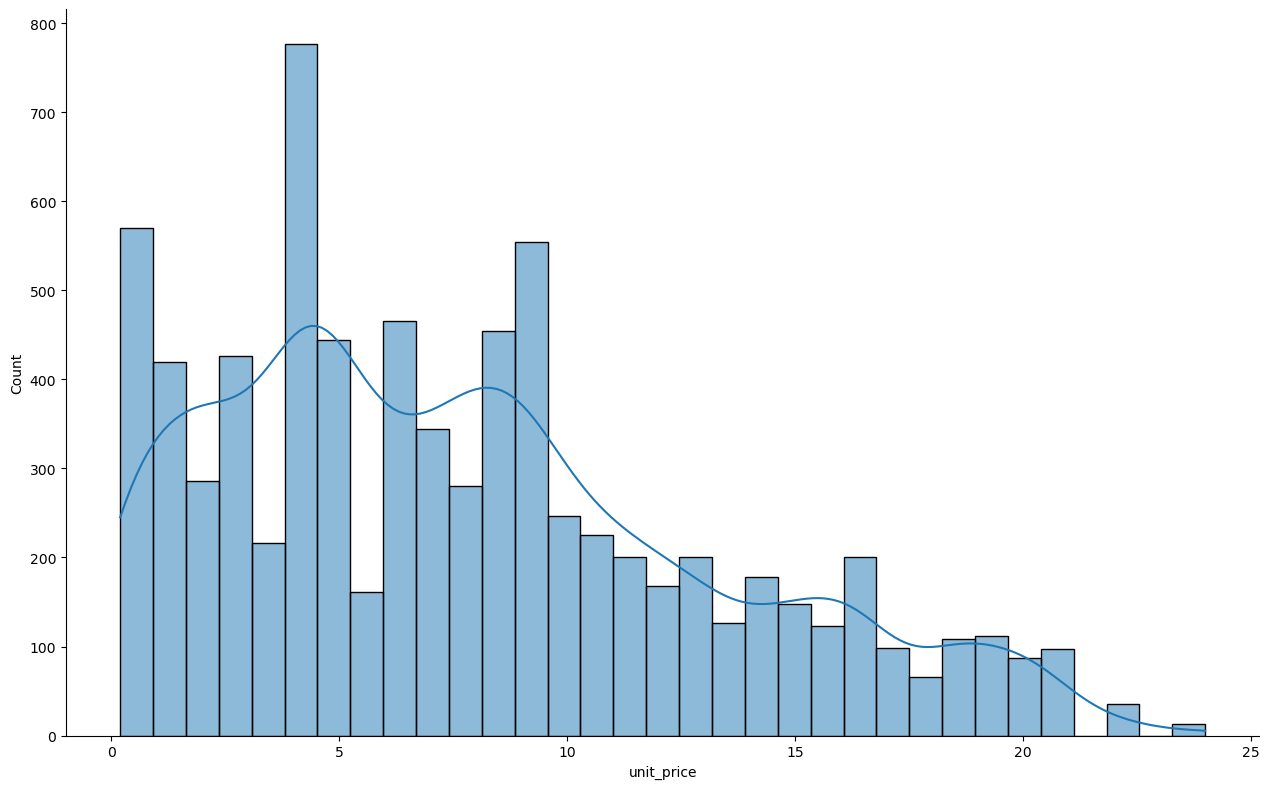

In [8]:
 plot_continuous_distribution(df, column='unit_price')

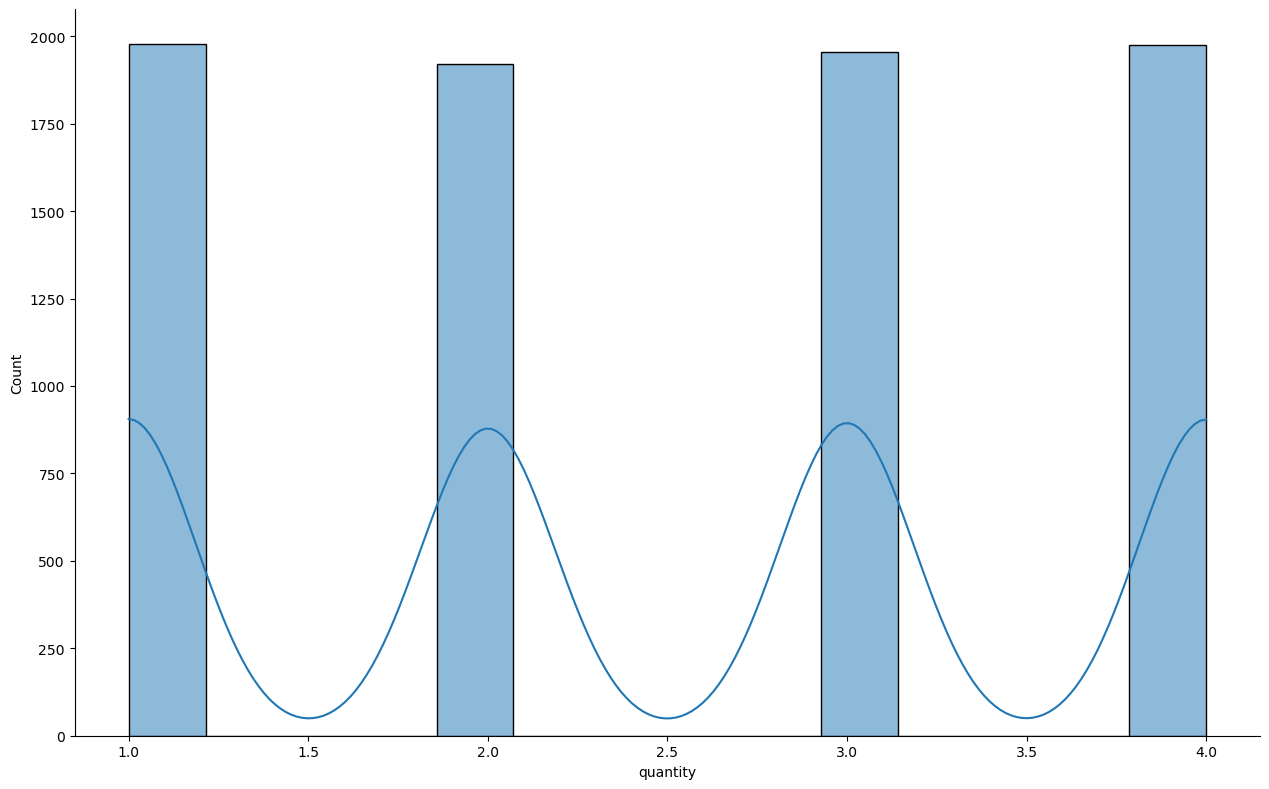

In [9]:
plot_continuous_distribution(df, column='quantity')

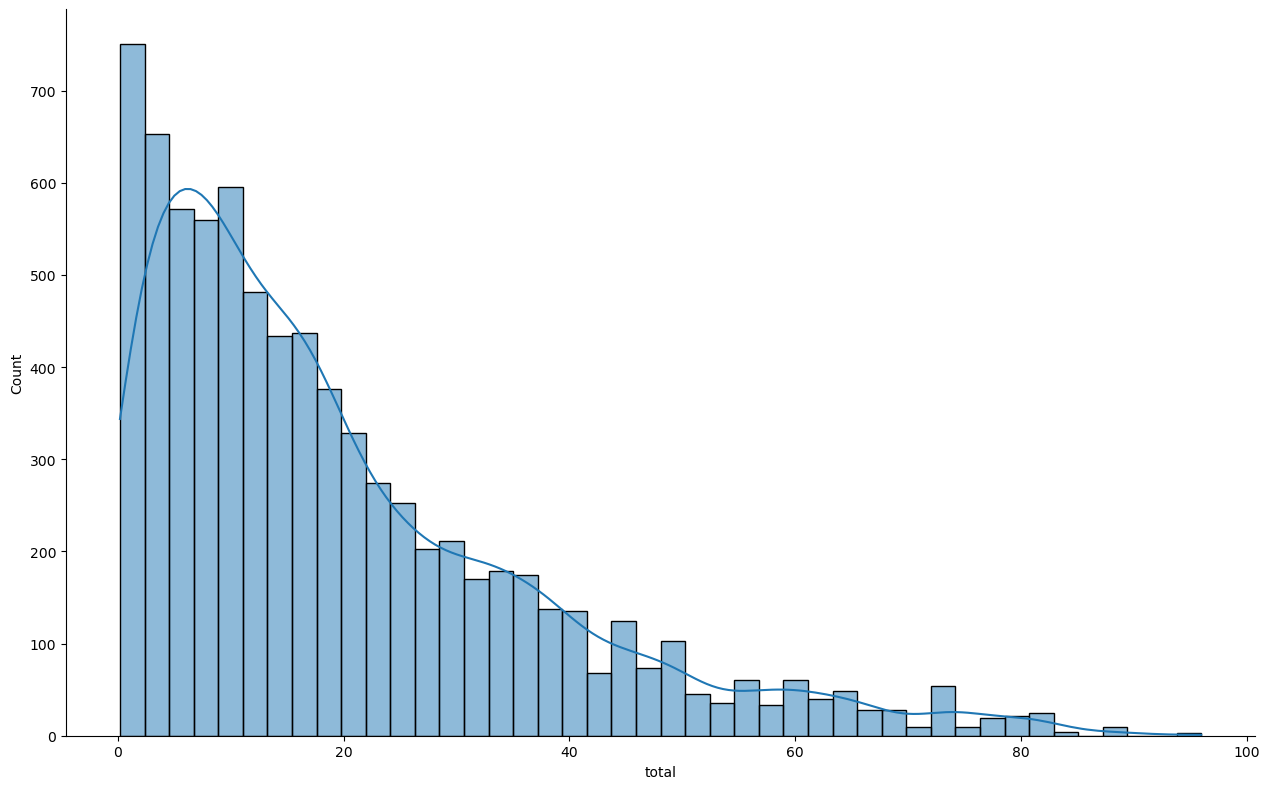

In [10]:
plot_continuous_distribution(df, column='total')

In [11]:
get_unique_values(df, 'category')

category column has 22 unique values:
['fruit' 'vegetables' 'refrigerated items' 'frozen' 'spices and herbs'
 'canned foods' 'packaged foods' 'condiments and sauces' 'beverages'
 'dairy' 'cheese' 'meat' 'seafood' 'baked goods' 'baking' 'snacks'
 'baby products' 'pets' 'personal care' 'medicine' 'kitchen'
 'cleaning products']


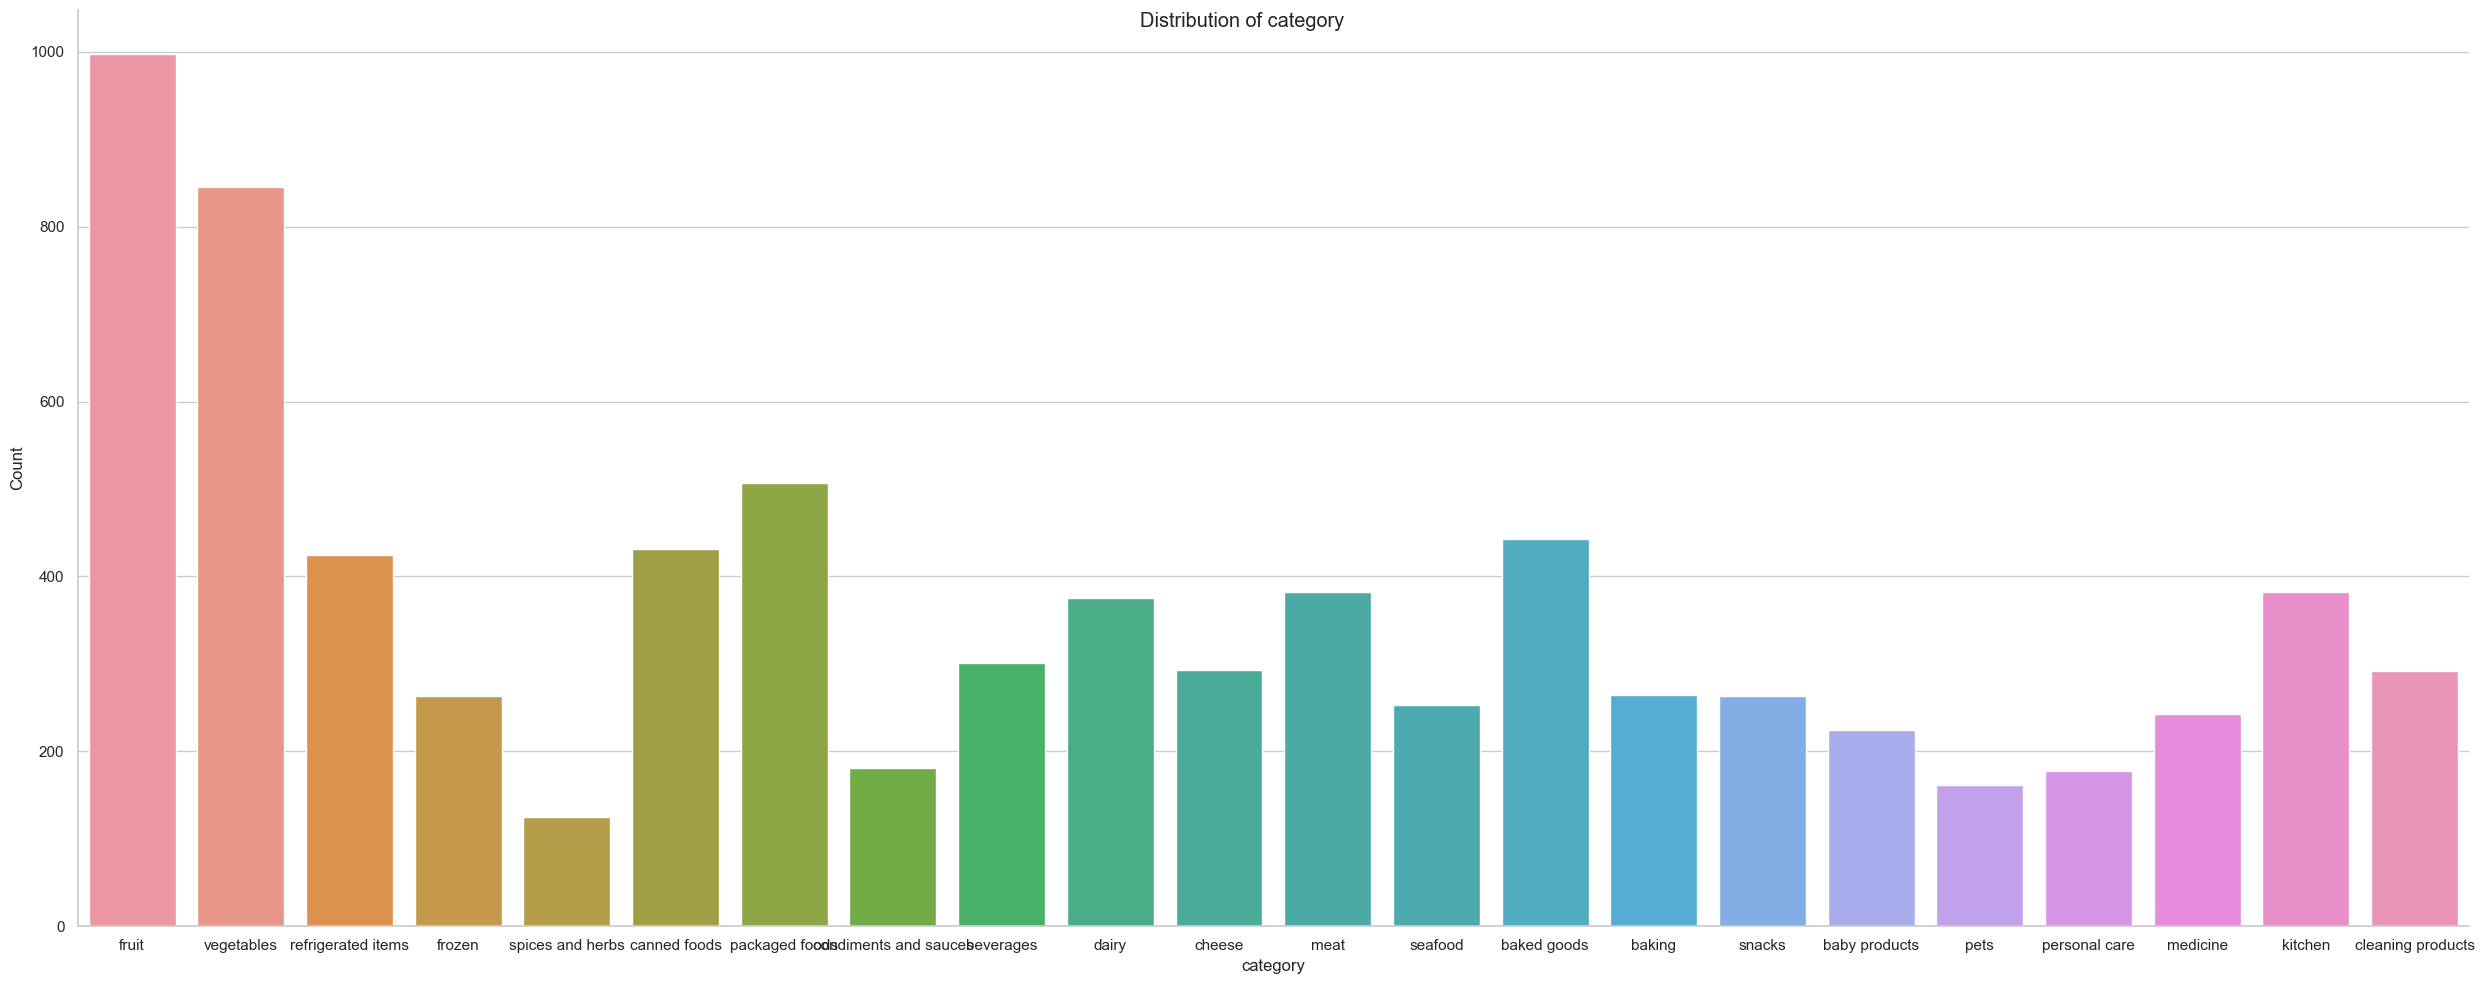

In [12]:
plot_categorical_distribution(df, 'category')

In [13]:
get_unique_values(df, 'customer_type')

customer_type column has 5 unique values:
['gold' 'standard' 'premium' 'basic' 'non-member']


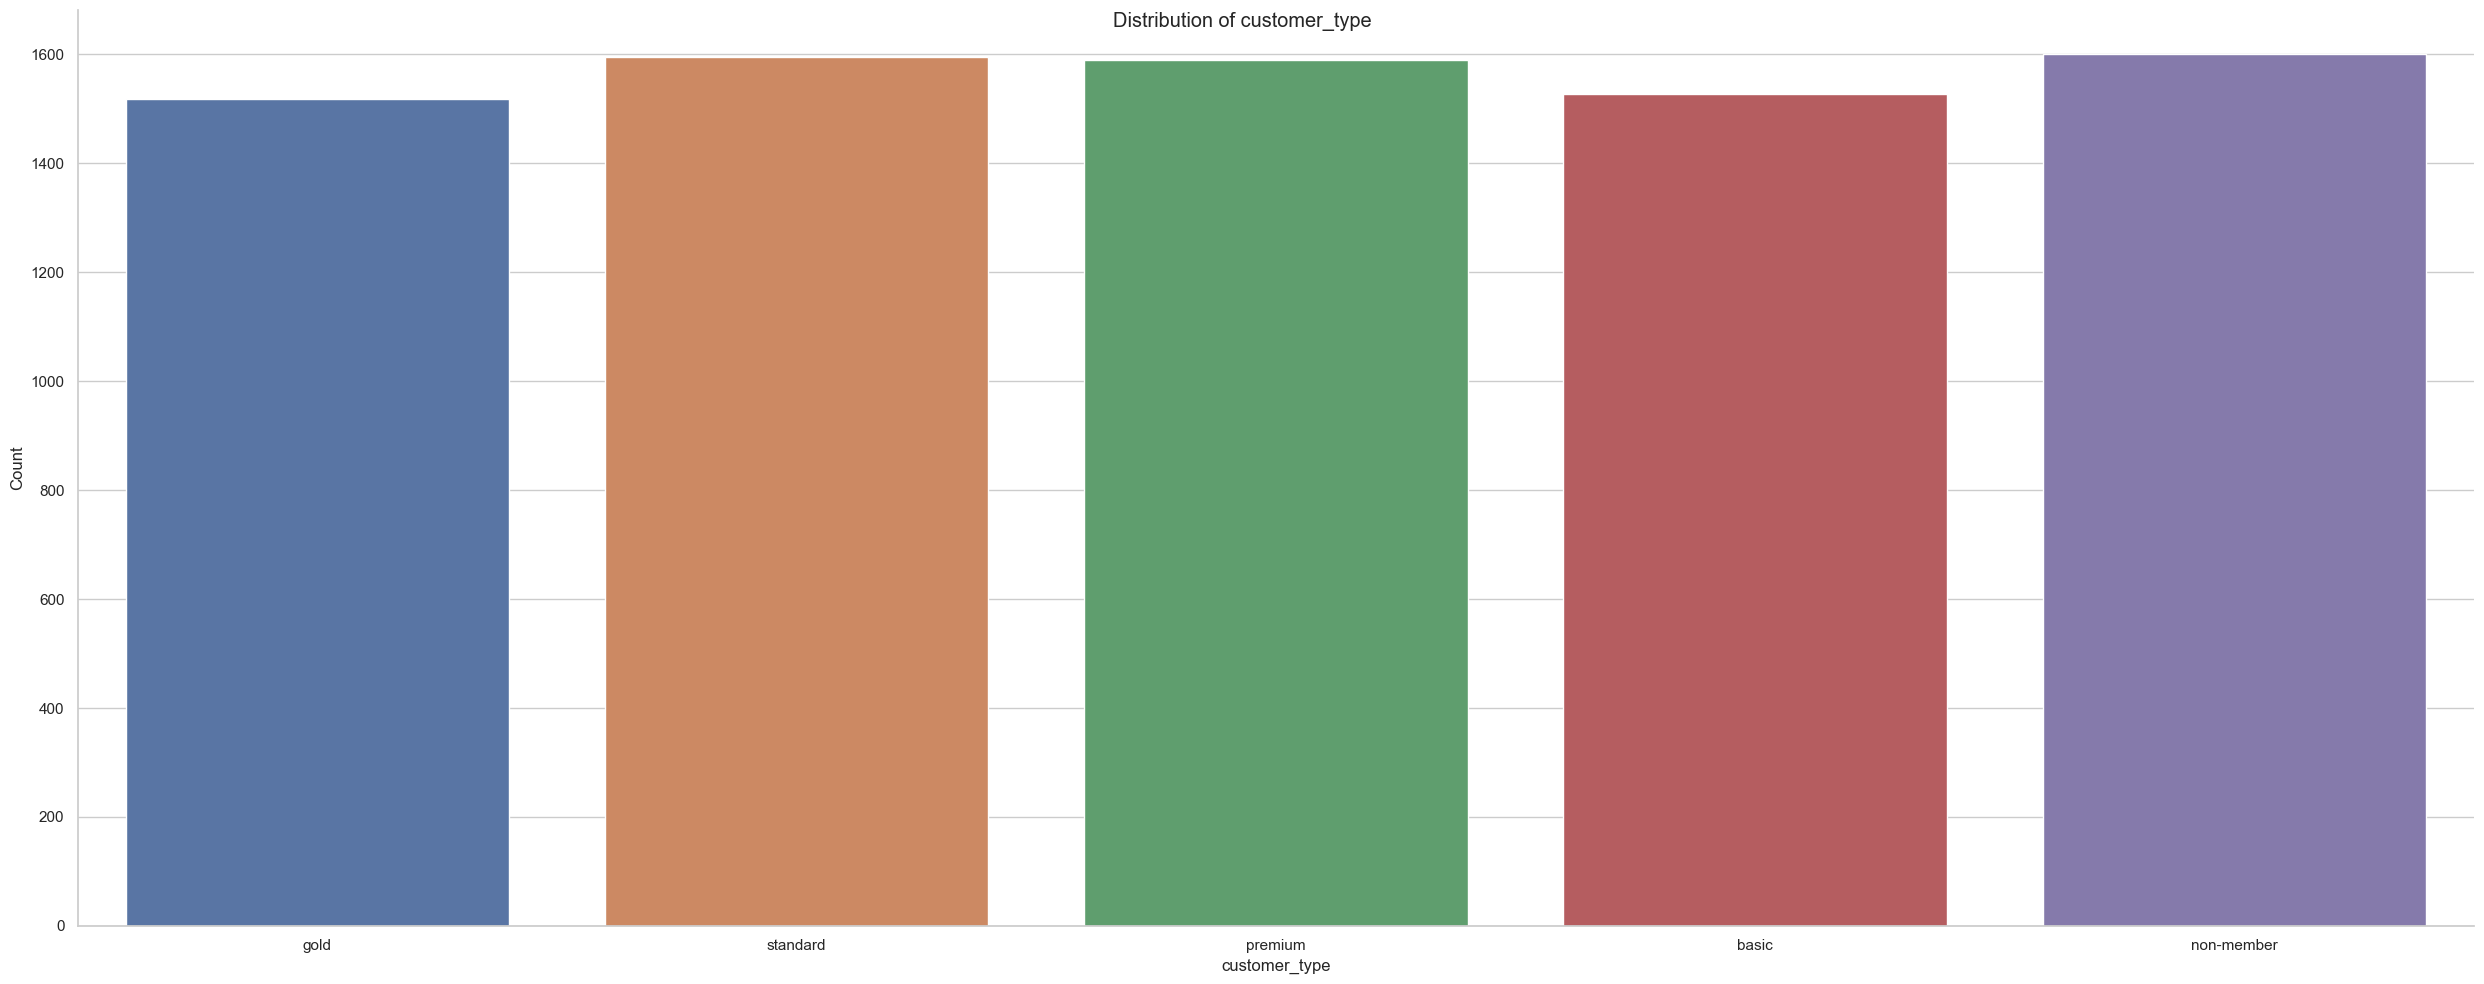

In [14]:
plot_categorical_distribution(df, 'customer_type')

In [15]:
get_unique_values(df, 'payment_type')

payment_type column has 4 unique values:
['e-wallet' 'debit card' 'cash' 'credit card']


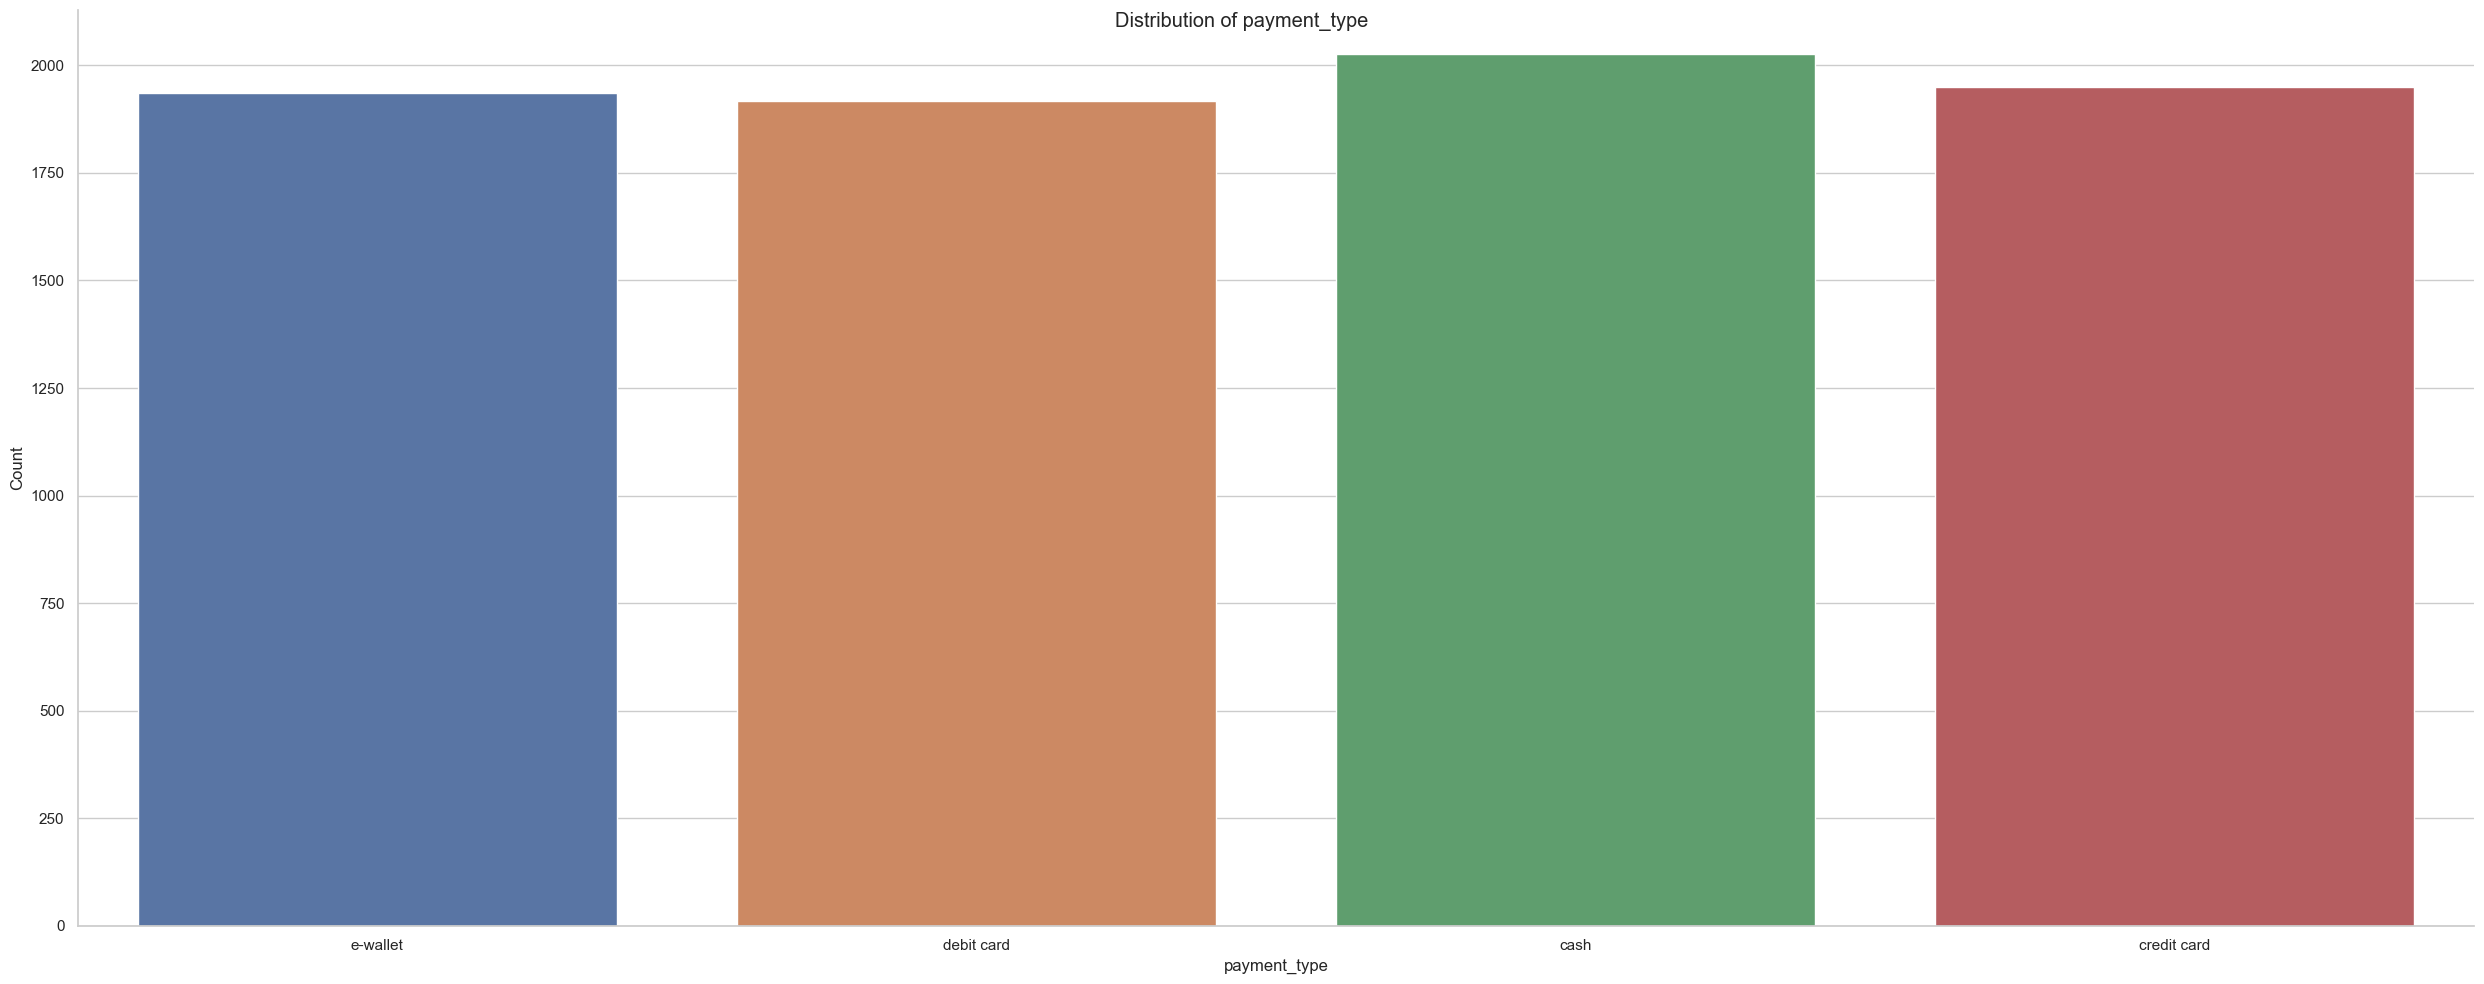

In [16]:
plot_categorical_distribution(df, 'payment_type')

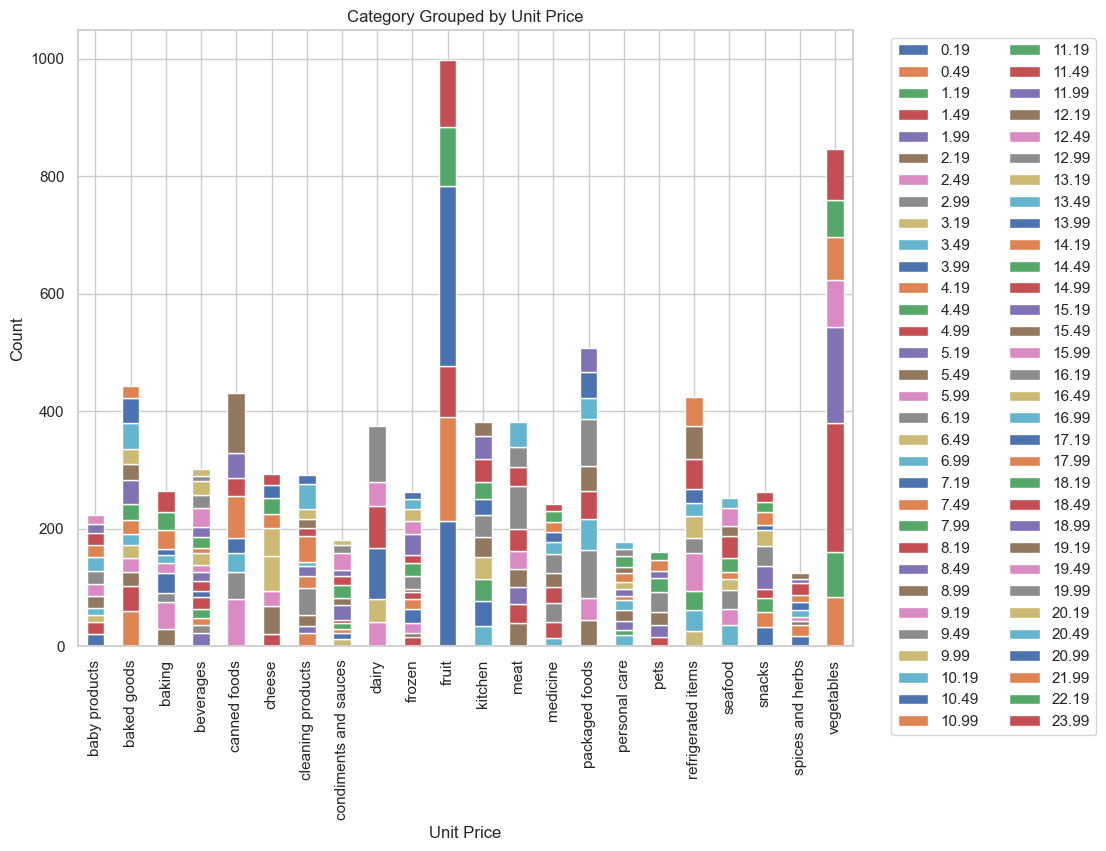

In [17]:
create_grouped_bar_chart(df)

In [18]:
df = convert_to_datetime(df, 'timestamp')

In [19]:
get_info(df)

This is quick info of data set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB
This is information if any Null value or not:
No Null Values 0


In [20]:
df.sample(10)

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
2972,cf167e40-4607-4a42-8000-f823513f9216,2022-03-01 13:11:26,c4355226-5f80-40ab-b3aa-de4344834a5d,canned foods,basic,2.49,4,9.96,cash
7129,1d24e4b0-67f4-4688-86c4-922dd2c5b7e1,2022-03-04 19:17:08,c1ec2a50-ae9e-4d1e-b591-ca0b2ff209a0,medicine,non-member,14.99,3,44.97,credit card
1577,99972a2c-f3c4-4710-aa9b-8fe92a6c83a0,2022-03-02 12:15:01,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,vegetables,basic,1.49,2,2.98,debit card
5875,8ba8e032-1aac-4107-b101-770d637cfb88,2022-03-01 18:48:41,146d5e4d-992a-4db7-904d-b8af359b80a7,baking,standard,8.19,3,24.57,cash
1574,e0c8e7aa-b9ae-40bc-b3fe-178d86128772,2022-03-03 18:19:06,4c529bbb-2443-43c7-806d-6e09c86ea578,vegetables,standard,4.49,2,8.98,debit card
239,415d11b9-0108-4d55-910d-5f667d3e66ef,2022-03-04 11:36:59,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,basic,3.99,3,11.97,credit card
6285,0ff9fe2d-c988-4fe0-bfc7-b6c392cc32e4,2022-03-02 14:29:54,3fbf5c52-e83a-4476-8475-07ce81e1bdb8,snacks,gold,3.99,2,7.98,debit card
1210,a3faef39-672b-4c9d-a09d-6179817deb82,2022-03-06 12:53:34,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,vegetables,non-member,4.19,3,12.57,e-wallet
7012,906b8ae6-4435-4c23-b30a-4b5467f5f530,2022-03-01 19:47:10,100ab1ec-39f5-41bd-984f-485039575827,medicine,premium,19.99,2,39.98,credit card
125,4a286c9d-094b-4d92-aae6-01b548a2243b,2022-03-05 17:53:38,04da844d-8dba-4470-9119-e534d52a03a0,fruit,standard,0.49,2,0.98,cash


In [21]:
corr_data(df)

,unit_price,quantity,total
unit_price,1.000000,0.024588,0.792018
quantity,0.024588,1.000000,0.521926
total,0.792018,0.521926,1.000000


We have completed an initial exploratory data analysis on the sample of data provided. We should now have a solid understanding of the data. 

The client wants to know

```
"How to better stock the items that they sell"
```

From this dataset, it is impossible to answer that question. In order to make the next step on this project with the client, it is clear that:

- We need more rows of data. The current sample is only from 1 store and 1 week worth of data
- We need to frame the specific problem statement that we want to solve. The current business problem is too broad, we should narrow down the focus in order to deliver a valuable end product
- We need more features. Based on the problem statement that we move forward with, we need more columns (features) that may help us to understand the outcome that we're solving for